In [162]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [163]:
def monte_carlo_simulation(s, a, b, pity_s, guarantee, amount):
    char_result = []
    roll_to_limited_s = []
    rng_result = []
    # base probability
    total_gacha = s+a+b
    prob_s = s/total_gacha
    prob_a = a/total_gacha
    prob_b = b/total_gacha
    prob_guarantee_s = 0.5
    
    # hitung probabilitas kumulatif
    cum_prob_s = prob_s
    cum_prob_a = cum_prob_s + prob_a
    cum_prob_b = cum_prob_a + prob_b
    
    # track the amount of character
    count_standard_s = 0
    count_limited_s = 0
    count_a = 0
    count_b = 0
    
    # pity system
    pity_s = pity_s
    pity_a = 0
    # pity counter
    count_pity_s = 0
    count_pity_a = 0
    
    # check guarantee
    is_guarantee = guarantee
    
    # looping
    for i in range(amount):
        # random number
        roll = random.random()
        
        if pity_s >= 89:
            pity_s = 0
            pity_a = 0
            count_pity_s += 1
            if is_guarantee:
                count_limited_s += 1
                char_result.append('LS')
                roll_to_limited_s.append(i+1)
                is_guarantee = False
            else:
                if random.random() < prob_guarantee_s:
                    count_limited_s += 1
                    char_result.append('LS')
                    roll_to_limited_s.append(i+1)
                else:
                    count_standard_s += 1
                    char_result.append('S')
                    is_guarantee = True
        else:
            if roll < cum_prob_s:
                pity_s = 0
                pity_a = 0
                if is_guarantee:
                    count_limited_s += 1
                    char_result.append('LS')
                    roll_to_limited_s.append(i+1)
                    is_guarantee = False
                else:
                    if random.random() < prob_guarantee_s:
                        count_limited_s += 1
                        char_result.append('LS')
                        roll_to_limited_s.append(i+1)
                    else:
                        count_standard_s += 1
                        char_result.append('S')
                        is_guarantee = True
            elif roll < cum_prob_a:
                count_a += 1
                pity_s += 1
                pity_a = 0
                char_result.append('A')
            else:
                if pity_a >= 9:
                    count_a += 1
                    pity_s += 1
                    pity_a = 0
                    count_pity_a += 1
                    char_result.append('A')
                else:
                    count_b += 1
                    pity_s += 1
                    pity_a += 1
                    char_result.append('B')
        rng_result.append(roll)
    
    # summary
    print('Base Probabilty Karakter')
    print(f'probability S: {prob_s:.5f}\nprobability A: {prob_a:.5f}\nprobability B: {prob_b:.5f}')
    print(f'\nProbabilitas Kumulatif')
    print(f'Probabilitas S: {cum_prob_s:.5f}\nProbabilitas A: {cum_prob_a:.5f}\nProbabilitas B: {cum_prob_b:.5f}')
    
        
    
    return rng_result, char_result, roll_to_limited_s, count_limited_s, count_standard_s, count_a, count_b

## Input History Data

In [164]:
# Input gacha history
S_char = 5
A_char = 41
B_char = 255
# state awal
pity_awal = 11
guarantee = True
total_sim = 1000000

roll_cost = 160

#jika pity awal 90 maka reset jadi 0 jika melebihi 90 maka sisa dibagi 90
pity_awal = pity_awal if pity_awal < 90 else pity_awal%90
print(f'pity awal : {pity_awal}')

pity awal : 11


## Jalankan Simulasi

In [165]:
rng_result, char_result, roll_to_limited_s, count_limited_s, count_standart_s, count_a, count_b = monte_carlo_simulation(S_char, A_char, B_char, pity_awal, guarantee, total_sim)

Base Probabilty Karakter
probability S: 0.01661
probability A: 0.13621
probability B: 0.84718

Probabilitas Kumulatif
Probabilitas S: 0.01661
Probabilitas A: 0.15282
Probabilitas B: 1.00000


## Hasil Simulasi

In [166]:
#jumlah total karakter S
count_s = count_limited_s + count_standart_s
#probabilitas karakter
prob_limited_s = count_limited_s/total_sim
prob_s = count_s/total_sim
prob_a = count_a/total_sim
prob_b = count_b/total_sim

print(f'Hasil simulasi setelah {total_sim} kali pull')

print(f'\nJumlah karakter\n---------------------')
print(f'Limited S: {count_limited_s}')
print(f'S: {count_s}')
print(f'A: {count_a}')
print(f'B: {count_b}')

print(f'\nProbabilitas karakter \n---------------------')
print(f'Limited S: {prob_limited_s*100:.2f}%')
print(f'S: {prob_s*100:.2f}%')
print(f'A: {prob_a*100:.2f}%')
print(f'B: {prob_b*100:.2f}%')

Hasil simulasi setelah 1000000 kali pull

Jumlah karakter
---------------------
Limited S: 14196
S: 21315
A: 170180
B: 808505

Probabilitas karakter 
---------------------
Limited S: 1.42%
S: 2.13%
A: 17.02%
B: 80.85%


### Karakter S in General

In [167]:
# average pull needed (ditambah 1 karena index mulai dari 0)
rolls_to_get_s = [index + 1 for index, char in enumerate(char_result) if char == 'S' or char == 'LS']
print(f'Rolls at which character S was obtained: {rolls_to_get_s}')

first_roll = rolls_to_get_s[0]+pity_awal
interval_rolls_to_s = [first_roll] + [rolls_to_get_s[i] - rolls_to_get_s[i-1] for i in range(1, len(rolls_to_get_s))]

print(f'Rolls to get character S: {interval_rolls_to_s}')

print(f'\n\nSummary\n---------------------')
average_s = np.mean(interval_rolls_to_s)
print(f'Average rolls to get character S: {average_s:.1f} Pulls')
print(f'Average cost to get character S: {average_s*roll_cost:.1f} Polychromes')

#pull needed to get the character from pity awal
print(f'---------------------')
print(f'Pity awal : {pity_awal}')
pull_needed = average_s - pity_awal 
print(f'Pull needed to get the character based on pity awal : {pull_needed:.0f} Pulls')
print(f'Cost needed to get limited character S: {pull_needed*roll_cost:.0f} Polychromes')


amount_pity_s = interval_rolls_to_s.count(90)
print(f'\nPity\n---------------------')
print(f'Amount of pity S: {amount_pity_s}')
print(f'Probability of getting unlucky: {(amount_pity_s/total_sim)*100:.3f}%')

Rolls at which character S was obtained: [67, 119, 145, 235, 312, 368, 385, 413, 417, 447, 463, 483, 518, 571, 661, 751, 841, 852, 942, 949, 1039, 1079, 1081, 1104, 1129, 1208, 1298, 1323, 1328, 1358, 1419, 1421, 1430, 1513, 1532, 1558, 1583, 1594, 1603, 1648, 1664, 1681, 1710, 1779, 1789, 1829, 1919, 2009, 2099, 2102, 2137, 2164, 2226, 2315, 2347, 2437, 2481, 2529, 2562, 2644, 2646, 2690, 2742, 2814, 2830, 2901, 2991, 3004, 3062, 3063, 3139, 3171, 3232, 3238, 3244, 3250, 3263, 3280, 3326, 3414, 3504, 3532, 3580, 3588, 3648, 3738, 3828, 3873, 3900, 3901, 3927, 3973, 3989, 4031, 4121, 4123, 4194, 4284, 4294, 4373, 4432, 4433, 4467, 4484, 4574, 4578, 4593, 4683, 4710, 4800, 4831, 4921, 4958, 5030, 5035, 5125, 5171, 5177, 5267, 5327, 5329, 5419, 5509, 5591, 5623, 5713, 5798, 5888, 5937, 5950, 6040, 6079, 6120, 6198, 6288, 6291, 6341, 6370, 6456, 6546, 6569, 6596, 6605, 6612, 6632, 6684, 6774, 6825, 6830, 6869, 6878, 6937, 6972, 7062, 7077, 7167, 7175, 7208, 7232, 7286, 7376, 7466, 7491, 7

### Karakter Limited S

In [168]:
print(roll_to_limited_s)
#Check if got limited character S first
#Kalo gadapet limited duluan gaperlu ditambah dg pity awal
first_roll = roll_to_limited_s[0] if rolls_to_get_s[0]<roll_to_limited_s[0] else roll_to_limited_s[0] + pity_awal

interval_limited_s = [first_roll] + [roll_to_limited_s[i] - roll_to_limited_s[i-1] for i in range(1, len(roll_to_limited_s))]
print(f'\nRolls at which limited character S was obtained: \n{interval_limited_s}')

print(f'\n\nSummary\n---------------------')
average_limited_s = np.mean(interval_limited_s)
print(f'Average rolls to get limited character S: {average_limited_s:.1f} Pulls')
print(f'Average cost to get limited character S: {average_limited_s*roll_cost:.1f} Polychromes')

#pull needed to get the character from pity awal
print(f'---------------------')
print(f'Pity awal : {pity_awal}')
print(f'Pull needed to get the character based on pity awal : {average_limited_s - pity_awal:.0f} Pulls')
print(f'Cost needed to get limited character S: {(average_limited_s - pity_awal)*roll_cost:.0f} Polychromes')

#pity counter
amount_pity_s = interval_limited_s.count(90)
print(f'\nPity\n---------------------')
print(f'Amount of pity S: {amount_pity_s}')
print(f'Probability of getting unlucky {(amount_pity_s/total_sim)*100:.3f}%')

[67, 145, 235, 312, 368, 413, 447, 483, 518, 571, 751, 841, 942, 949, 1079, 1104, 1129, 1208, 1298, 1323, 1328, 1419, 1421, 1513, 1532, 1583, 1594, 1603, 1664, 1681, 1779, 1829, 2009, 2099, 2102, 2137, 2164, 2315, 2347, 2437, 2481, 2529, 2644, 2690, 2814, 2830, 2901, 3004, 3062, 3063, 3139, 3232, 3238, 3250, 3263, 3326, 3504, 3532, 3588, 3648, 3738, 3828, 3900, 3901, 3927, 3989, 4031, 4121, 4123, 4194, 4294, 4373, 4432, 4467, 4484, 4578, 4683, 4800, 4831, 4921, 4958, 5030, 5125, 5177, 5267, 5329, 5509, 5591, 5713, 5798, 5888, 5950, 6040, 6079, 6120, 6288, 6341, 6370, 6546, 6569, 6596, 6605, 6632, 6774, 6830, 6869, 6878, 6972, 7077, 7167, 7208, 7232, 7286, 7466, 7550, 7640, 7676, 7856, 7910, 8090, 8116, 8133, 8156, 8246, 8267, 8374, 8464, 8644, 8655, 8735, 8825, 8846, 8919, 8943, 9091, 9155, 9332, 9372, 9482, 9523, 9613, 9661, 9739, 9776, 9901, 10010, 10037, 10064, 10163, 10171, 10196, 10234, 10250, 10340, 10436, 10526, 10549, 10708, 10807, 10825, 10927, 10929, 10955, 10984, 11093, 1109

## Tabel

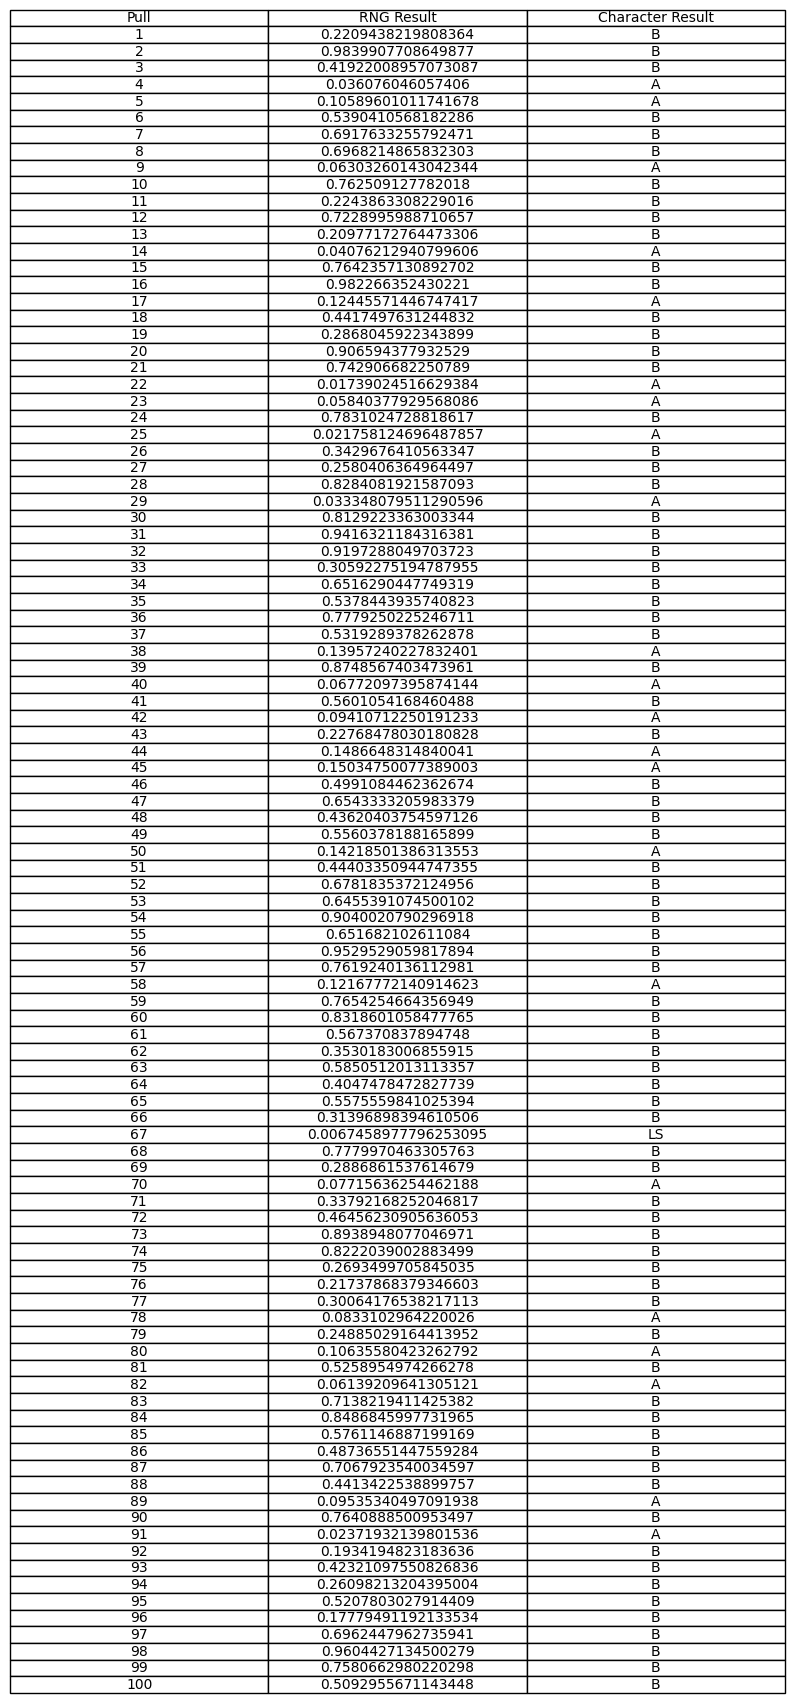

In [169]:
data = {
    'Pull': range(1, total_sim + 1),
    'RNG Result': rng_result,
    'Character Result': char_result
}

df = pd.DataFrame(data)

# Plot the table
fig, ax = plt.subplots(figsize=(10, 6))
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=df.head(100).values, colLabels=df.columns, cellLoc='center', loc='center')

plt.show()